In [82]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import SpectralClustering
#dataset=pd.read_csv("urbanGB.csv")
from numpy import genfromtxt
dataset = genfromtxt('urbanGB.csv', delimiter=',', skip_header = 1)
spectral_dataset=[]
for n in range(500):
    spectral_dataset.append(dataset[n])
s_dataset=np.array(spectral_dataset)

In [83]:
#our_dataset
X=s_dataset

In [84]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

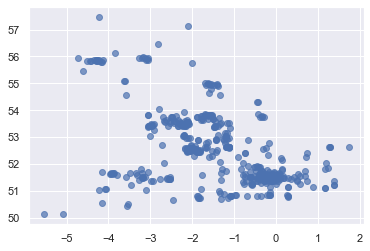

In [137]:
#visualising data points
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [117]:
#calculating weight matrix on the basis of euclidean distance
W = pairwise_distances(s_dataset, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
#avoiding fully connected graph
W = np.vectorize(vectorizer)(W)
print(W)

[[1 0 0 ... 1 0 0]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]]


In [118]:
# degree matrix
D = np.diag(np.sum(W, axis=1))
D

array([[303,   0,   0, ...,   0,   0,   0],
       [  0, 468,   0, ...,   0,   0,   0],
       [  0,   0, 471, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 500,   0,   0],
       [  0,   0,   0, ...,   0, 468,   0],
       [  0,   0,   0, ...,   0,   0, 471]])

In [119]:
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

laplacian matrix:
[[302   0   0 ...  -1   0   0]
 [  0 467  -1 ...  -1  -1  -1]
 [  0  -1 470 ...  -1  -1  -1]
 ...
 [ -1  -1  -1 ... 499  -1  -1]
 [  0  -1  -1 ...  -1 467  -1]
 [  0  -1  -1 ...  -1  -1 470]]


In [120]:
e, v = np.linalg.eig(L)

In [121]:
#almost zero
e[0]

(-2.1202529806429677e-13+0j)

In [122]:
#second eigen vector
eigen_vector=v[1]

In [129]:
cluster1=[]
cluster2=[]
for i in range(500):
    if eigen_vector[i]>0:
        cluster1.append(i)
    else:
        cluster2.append(i)

In [130]:
len(cluster1)

236

In [131]:
len(cluster2)

264

In [132]:
c1=[]
for i in cluster1:
    c1.append(s_dataset[i])
c2=[]
for i in cluster2:
    c2.append(s_dataset[i])

In [133]:
c1=np.array(c1)
c2=np.array(c2)

In [134]:
print("Cluster 1")
c1

Cluster 1


array([[-3.113, 55.871],
       [-0.089, 51.381],
       [-0.327, 51.448],
       [-0.447, 50.815],
       [-0.417, 51.499],
       [-1.539, 53.811],
       [-2.090, 52.974],
       [-4.284, 55.886],
       [0.278, 51.148],
       [-2.982, 51.348],
       [-1.164, 52.672],
       [-1.189, 53.046],
       [-2.618, 53.652],
       [-1.602, 54.981],
       [-3.540, 50.490],
       [-1.552, 53.809],
       [0.084, 51.604],
       [0.873, 51.143],
       [-3.327, 51.594],
       [-2.020, 52.583],
       [-2.015, 52.554],
       [-2.188, 53.917],
       [-1.087, 50.803],
       [-2.245, 53.459],
       [-0.197, 51.458],
       [-0.440, 51.422],
       [0.009, 51.491],
       [-0.362, 50.812],
       [-1.901, 52.486],
       [-0.030, 51.405],
       [-3.046, 53.421],
       [-4.165, 55.781],
       [-1.631, 53.681],
       [-2.484, 53.746],
       [-0.258, 51.625],
       [-1.273, 52.934],
       [-0.026, 51.504],
       [-2.544, 51.426],
       [-2.118, 52.519],
       [0.182, 51.463],
     

In [135]:
print("Cluster 2")
c2

Cluster 2


array([[-3.947, 51.659],
       [-0.275, 53.748],
       [-3.943, 51.632],
       [-1.347, 53.494],
       [-2.079, 52.482],
       [-2.163, 52.562],
       [-0.190, 51.535],
       [-3.886, 51.620],
       [-1.937, 52.517],
       [-0.326, 51.578],
       [-0.403, 51.630],
       [-2.173, 53.524],
       [-0.425, 51.881],
       [-1.546, 54.941],
       [-0.105, 51.522],
       [-1.600, 52.275],
       [-0.063, 51.386],
       [-3.275, 51.404],
       [-0.234, 51.593],
       [-1.347, 52.065],
       [-0.159, 51.522],
       [-3.135, 51.519],
       [-0.365, 51.444],
       [-4.132, 55.866],
       [-3.202, 51.482],
       [-2.093, 53.498],
       [-4.163, 51.683],
       [-4.340, 55.857],
       [0.134, 51.766],
       [-4.423, 55.832],
       [-2.523, 53.584],
       [-1.488, 53.380],
       [0.065, 51.648],
       [-0.053, 51.401],
       [-1.801, 53.642],
       [-3.176, 51.502],
       [-3.192, 51.658],
       [-0.489, 51.354],
       [0.276, 50.804],
       [-2.948, 53.412],
   